# MNIST digit recognition using CNN with Keras [0.9932]

In [9]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import datetime as dt

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import keras
from keras import backend as K

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [10]:
train = pd.read_csv(r"F:\Kaggle\MNIST\train.csv")
test = pd.read_csv(r"F:\Kaggle\MNIST\test.csv")

In [11]:
df = train.copy()

In [12]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print(df.shape , test.shape)

(42000, 785) (28000, 784)


In [14]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [15]:
y = df.label.values.astype('int32')
df = df[df.columns[1:]].values.astype('float32')

X_train , X_test , y_train , y_test = train_test_split(df , y , test_size = 0.2 , random_state = 100)

In [16]:
print ( X_train.shape , y_train.shape)

(33600, 784) (33600,)


In [17]:
test = test.values.astype('float32')

In [18]:
X_train = X_train.reshape( -1 , 28 , 28 , 1)
X_test = X_test.reshape( -1 , 28 , 28 , 1)
test = test.reshape( -1 , 28 , 28 , 1)

In [19]:
X_train.shape

(33600, 28, 28, 1)

In [66]:
new = pd.read_csv(r"F:\Kaggle\MNIST\train.csv")
new = new.iloc[: , 1:] 

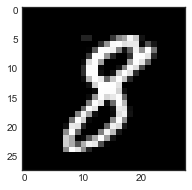

In [72]:
plt.figure(figsize = [3, 3])
plt.imshow(new.values[i].reshape(28,28), cmap='gray')

In [89]:
new.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [93]:
label_counter = new.label.value_counts()
print (label_counter)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


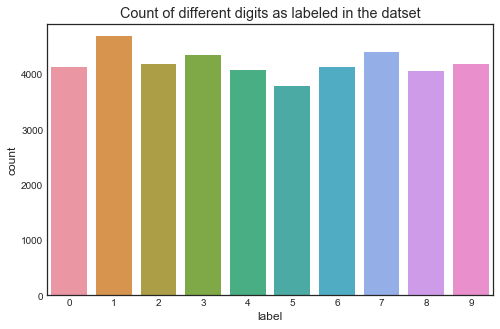

In [98]:
plt.subplots(figsize = (8,5))
plt.title('Count of different digits as labeled in the datset')
sns.countplot(x=new.label , data=new)
plt.show()

### Now we have 33,600 images with dimensions of 28 x 28 x 1 in X_train .

In [20]:
# Normalizing

In [21]:
X_train = X_train / 255
X_test = X_test / 255
test = test / 255

### Converting y_train and y_test into one hot encoder , eg.  3--> [0,0,0,1,0,0,0,0,0,0]

In [22]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)  #  10 is used because we have to classify images in 10 groups

In [23]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

### Making the model with convolutional layers , maxpool layers and dropout layers to enhance regularization and generalization with further avoidance to overfitting .

In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(28 , 28 , 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))      #  10 is used because we have to classify images in 10 groups

In [25]:
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [26]:
model.compile(optimizer = RMSprop(lr=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.0, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [28]:
batch_size = 64
epochs = 10
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

In [30]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[lr_reduce],
                    validation_data=(X_test, y_test),
                    epochs = epochs, verbose = 2)

Epoch 1/10
 - 417s - loss: 0.2580 - acc: 0.9207 - val_loss: 0.1058 - val_acc: 0.9704
Epoch 2/10
 - 397s - loss: 0.0973 - acc: 0.9699 - val_loss: 0.0447 - val_acc: 0.9862
Epoch 3/10
 - 397s - loss: 0.0720 - acc: 0.9777 - val_loss: 0.0534 - val_acc: 0.9837
Epoch 4/10
 - 410s - loss: 0.0618 - acc: 0.9811 - val_loss: 0.0585 - val_acc: 0.9806

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/10
 - 408s - loss: 0.0431 - acc: 0.9857 - val_loss: 0.0278 - val_acc: 0.9911
Epoch 6/10
 - 460s - loss: 0.0351 - acc: 0.9893 - val_loss: 0.0265 - val_acc: 0.9921
Epoch 7/10
 - 451s - loss: 0.0348 - acc: 0.9894 - val_loss: 0.0275 - val_acc: 0.9923
Epoch 8/10
 - 483s - loss: 0.0343 - acc: 0.9893 - val_loss: 0.0238 - val_acc: 0.9925
Epoch 9/10
 - 459s - loss: 0.0327 - acc: 0.9898 - val_loss: 0.0253 - val_acc: 0.9925
Epoch 10/10
 - 452s - loss: 0.0309 - acc: 0.9906 - val_loss: 0.0254 - val_acc: 0.9932


In [31]:
score = model.evaluate(X_test, y_test, verbose=0)
print('valid loss:', score[0])
print('valid accuracy:', score[1])

valid loss: 0.0253661125464
valid accuracy: 0.993214285714


In [32]:
pred = model.predict(test)

In [33]:
pred.shape

(28000, 10)

In [35]:
pred

array([[  8.17432948e-08,   5.17682821e-08,   9.99997258e-01, ...,
          1.10032931e-06,   3.02541672e-08,   2.10106013e-08],
       [  9.99830604e-01,   4.00989848e-07,   1.72920445e-05, ...,
          3.78791356e-07,   3.88838225e-06,   9.01630265e-05],
       [  1.15174403e-09,   2.51294052e-09,   4.65756500e-08, ...,
          2.01035434e-07,   1.58212140e-06,   9.99985576e-01],
       ..., 
       [  6.08580894e-11,   4.94628435e-11,   1.13274989e-09, ...,
          2.41901166e-09,   1.45038861e-08,   4.43011405e-09],
       [  1.36320455e-06,   9.42383522e-08,   8.79328809e-07, ...,
          4.52687846e-06,   7.75751857e-07,   9.99860883e-01],
       [  1.04026121e-09,   7.21880222e-10,   1.00000000e+00, ...,
          4.57098785e-08,   2.64204072e-08,   5.02913655e-10]], dtype=float32)

In [43]:
pred_digits = np.argmax(pred , axis = 1)
ImageId = range( 1 , len(pred_digits)+1 )

### pred_digits contains the predicted labels of the digits .
### argmax(axis = 1) is converting the one hot encoder back to the labels along the row axis .

In [44]:
pred_digits

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [45]:
len(ImageId)

28000

In [46]:
context = {"ImageId" : ImageId , "Label" : pred_digits }
ans = pd.DataFrame(context)

### ans is the predicted dataframe by CNN

In [48]:
ans.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


### Converting the dataframe to csv file

In [49]:
ans.to_csv("Predictions by CNN.csv", index=None)

In [99]:
2+2

4